# Music & Mental Health | Trying to predict music effects
_______________________________________

## Data Transformation / Data Visualisation / Feature Engineering

* What **aggregations** to do?
* What **plots** to visualize? --> matplotlib + seaborn + kaggle

## Trying to discover trends / predict music effects:

1) What is the connection between **music use** and its effect on **disease**(mental health)?
2) What is the connection between **music preference** and effect on **disease**(mental health)? 
_________
* Granularity --> fav genre as first, related statistcal, individualy fre compare to disease
_________
3) What is the connection between **music genre** and effect on **disease**(mental health)?
4) Which **disease**(mental health) experiences the **greatest effect** from music? 
_________
* Plot difference between mental health and anxiety
_________
5) Can I make helpful recommendations based on these findings? 
6) What **age** (range) experiences the most the **diseases**. What is there music effect? What music genre do they listen to?
What is there music use?

_________

* What is the **mean** anxiety (1.0-10.0) level (numerical) for **every possible music effect** (Improve, No effect, Worsen)(categorical)
* What is the **mean** depression (1.0-10.0) level (numerical)
* What is the **mean** insomnia (1.0-10.0) level (numerical)
* What is the **mean** OCD (1.0-10.0) level (numerical)

_________

* More than 2 poss valuebale --> statistical test ?

_________

TO DO: 

- Calculate the right things (aggregations)
- Plot these questions:
In order to plot you first need to calculate the right thing.

- Plot when visualization is relevant

* Aggregation --> function
* Plot --> function

________

In [15]:
# Load libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy import stats


In [16]:
# Read cleaned dataset
# data_mmh = pd.read_csv('../../data/cleaned/data_mmh_cleaned1.csv')
# Remove the Unnamed Column: 
data_mmh = pd.read_csv('../../data/cleaned/data_mmh_cleaned2.csv', index_col=0)


In [66]:
data_mmh.head()


,Age,Hours per day,While working,Instrumentalist,Composer,Favorite genre,Exploratory,Foreign languages,BPM,Frequency [Classical],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,18.0,4.0,No,No,No,Video game music,No,Yes,132.0,Never,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
1,61.0,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
2,18.0,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
3,18.0,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,Rarely,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
4,18.0,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,Sometimes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


In [17]:
data_mmh.shape

(616, 31)

## Statistical Test: ANOVA (numerical vs. categorical)

### 1) Connection **disease** and **music use** | ANOVA (numerical vs. categorical):


In [18]:
# Test for checking relationship between categorical and numerical #ANOVA

# Music effects (c) and 'Hours per day' (n)
data_mmh.groupby('Music effects').agg({"Hours per day": 'mean'})
#data_mmh.groupby('Music effects').agg({"Hours per day": 'mean'}).plot.barh()

,Hours per day
Music effects,
Improve,3.763841
No effect,3.561111
Worsen,2.933333


In [117]:
#* Null Hypothesis (H0): The means of all groups are equal.
#* Alternative Hypothesis (H1): At least one group's mean is different from the others.
# H0: --> No difference, no relation -> don't use it in your model
# H1: --> Difference, relation -> use it in your model

#f_oneway() function takes the group data as input
# returns F-statistic and P-value
from scipy.stats import f_oneway

# Running the one-way anova test between 'Music effects' and 'Hours per day'
# Assumption (H0) is that Hours per day and Music effects are NOT correlated

# Finds out 'Hours per day' for each 'Music effect' as a list
CategoryGroupList = data_mmh.groupby('Music effects') ['Hours per day'].apply(list)

# Performing the ANOVA test
AnovaResults = f_oneway(*CategoryGroupList)
print('P-Value for Anova is:', round(AnovaResults[1],2))

#We accept the H0 only when P-Value > 0.05. No difference, no relation -> don't use it in your model

P-Value for Anova is: 0.49


* If the p-value is less than your chosen significance level (e.g., 0.05), you can reject the null hypothesis and conclude that there are significant differences between the groups.

* If the p-value is greater than the significance level, you fail to reject the null hypothesis, suggesting no significant differences among the groups.

We accept H0

* (H0): The means of all groups are equal.
* (H0): No difference, no relation -> **don't use it in your model**
______


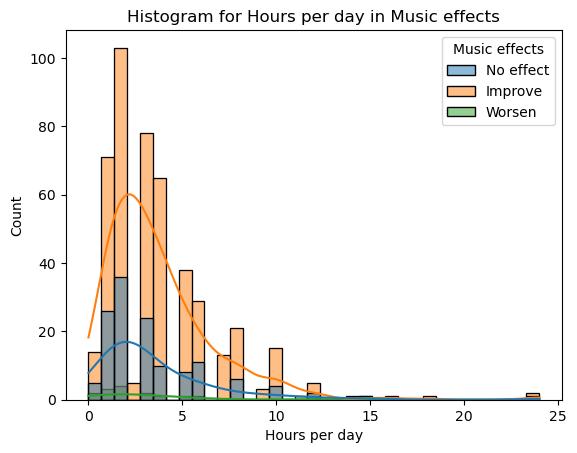

In [69]:
# Histplot 2:
#Function for a for loop for making a histoplot with categorical and numerical columns:

# Get average 'Disease' (numerical) for every possible 'Music use' (numerical/categorical):

def plot_categorical_histograms(data_mmh, categorical_column, numerical_column):
    categories = data_mmh[categorical_column].unique()
    
    sns.histplot(data=data_mmh, x=numerical_column, hue=categorical_column, kde=True)
    plt.title(f'Histogram for {numerical_column} in {categorical_column}')
    plt.show()

# Example data
data = data_mmh

# Call the function to plot histograms
plot_categorical_histograms(data_mmh, 'Music effects', 'Hours per day')

This is a nice histogram visualizing the aggregation I made. 

But we We accept H0 for this and will not be using this column in my model.

(H0): The means of all groups are equal.
(H0): No difference, no relation -> **don't use it in your model**
________

### 5) Connections **disease** and **age** | ANOVA (numerical vs. categorical):

In [142]:
data_mmh.groupby(['Age group']).agg({'Anxiety': 'mean'}) #categorical vs numerical

,Anxiety
Age group,
<10,8.000000
10's,5.994915
20's,6.242574
30's,5.693548
40's,5.545455
50's,2.631579
60's,5.100000
70's,4.000000
80's,0.000000


In [143]:
#* Null Hypothesis (H0): The means of all groups are equal.
#* Alternative Hypothesis (H1): At least one group's mean is different from the others.

#f_oneway() function takes the group data as input
# returns F-statistic and P-value
from scipy.stats import f_oneway

# Running the one-way anova test between 'Music effects' and 'Hours per day'
# Assumption (H0) is that Hours per day and Music effects are NOT correlated

# Finds out 'Hours per day' for each 'Music effect' as a list
AgeGroup_Anxiety = data_mmh.groupby('Age group') ['Anxiety'].apply(list)

# Performing the ANOVA test
AnovaResults = f_oneway(*AgeGroup_Anxiety)
print('P-Value for Anova is:', AnovaResults[1])

#We accept the H0 only when P-Value > 0.05

P-Value for Anova is: 3.7424910795553217e-06


* If the p-value is less < than your chosen significance level (e.g., "**0.05**), you can reject the null hypothesis and conclude that there are significant differences between the groups.

* If the p-value is greater > than the significance level, you fail to reject the null hypothesis, suggesting no significant differences among the groups.

We accept H0

* (H0): The means of all groups are equal.
* (H0): No difference, no relation -> **don't use it in your model**

In [144]:
#df['age_group'] = pd.cut(df['age'], 3)
labels = ["<10", "10's", "20's", "30's", "40's", "50's", "60's", "70's", "80's"]
data_mmh['Age group'] = pd.cut(data_mmh['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90], labels = labels)
#data_mmh['Age group'] = pd.cut(data_mmh['Age'], 9)
#data_mmh
data_mmh[['Age','Age group']]


,Age,Age group
0,18.0,10's
1,61.0,60's
2,18.0,10's
3,18.0,10's
4,18.0,10's
...,...,...
611,17.0,10's
612,18.0,10's
613,19.0,10's
614,19.0,10's


In [145]:
data_mmh['Age group'].value_counts()


10's    295
20's    202
30's     62
40's     22
50's     19
60's     10
70's      4
<10       1
80's      1
Name: Age group, dtype: int64

<Axes: xlabel='Age group', ylabel='count'>

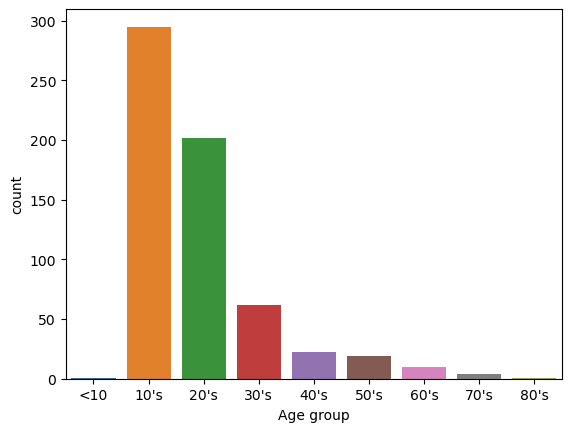

In [146]:
sns.countplot(data=data_mmh, x="Age group")

In [140]:
#Age group and Depression
data_mmh.groupby(['Age group']).agg({'Depression': 'mean'}) #categorical vs numerical


,Depression
Age group,
<10,2.000000
10's,4.549153
20's,5.638614
30's,5.258065
40's,5.000000
50's,2.157895
60's,4.500000
70's,2.500000
80's,0.000000


In [147]:
#* Null Hypothesis (H0): The means of all groups are equal.
#* Alternative Hypothesis (H1): At least one group's mean is different from the others.

#f_oneway() function takes the group data as input
# returns F-statistic and P-value
from scipy.stats import f_oneway

# Running the one-way anova test between 'Music effects' and 'Hours per day'
# Assumption (H0) is that Hours per day and Music effects are NOT correlated

# Finds out 'Hours per day' for each 'Music effect' as a list
AgeGroup_Depression = data_mmh.groupby('Age group') ['Depression'].apply(list)  #categorical vs numerical

# Performing the ANOVA test
AnovaResults = f_oneway(*AgeGroup_Depression)
print('P-Value for Anova is:', AnovaResults[1])

#We accept the H0 only when P-Value > 0.05

P-Value for Anova is: 2.6517940060639555e-06


* If the p-value is less < than your chosen significance level (e.g., "**0.05**), you can reject the null hypothesis and conclude that there are significant differences between the groups.

* If the p-value is greater > than the significance level, you fail to reject the null hypothesis, suggesting no significant differences among the groups.

We accept H0

* (H0): The means of all groups are equal.
* (H0): No difference, no relation -> **don't use it in your model**

In [150]:
#Age group and Insomnia
data_mmh.groupby(['Age group']).agg({'Insomnia': 'mean'}) #categorical vs numerical


,Insomnia
Age group,
<10,1.000000
10's,3.706780
20's,3.777228
30's,4.451613
40's,4.500000
50's,3.157895
60's,4.000000
70's,2.500000
80's,0.000000


In [148]:
#* Null Hypothesis (H0): The means of all groups are equal.
#* Alternative Hypothesis (H1): At least one group's mean is different from the others.

#f_oneway() function takes the group data as input
# returns F-statistic and P-value
from scipy.stats import f_oneway

# Running the one-way anova test between 'Music effects' and 'Hours per day'
# Assumption (H0) is that Hours per day and Music effects are NOT correlated

# Finds out 'Hours per day' for each 'Music effect' as a list
AgeGroup_Insomnia = data_mmh.groupby('Age group') ['Insomnia'].apply(list)  #categorical vs numerical

# Performing the ANOVA test
AnovaResults = f_oneway(*AgeGroup_Insomnia)
print('P-Value for Anova is:', AnovaResults[1])

#We accept the H0 only when P-Value > 0.05

P-Value for Anova is: 0.4403915524490828


* If the p-value is less < than your chosen significance level (e.g., "**0.05**), you can reject the null hypothesis and conclude that there are significant differences between the groups.

* If the p-value is greater > than the significance level, you fail to reject the null hypothesis, suggesting no significant differences among the groups.

We accept H0

* (H0): The means of all groups are equal.
* (H0): No difference, no relation -> **don't use it in your model**

In [149]:
#Age group and OCD
data_mmh.groupby(['Age group']).agg({'OCD': 'mean'}) #categorical vs numerical

,OCD
Age group,
<10,1.000000
10's,2.786441
20's,2.851485
30's,2.548387
40's,2.000000
50's,1.052632
60's,1.500000
70's,1.250000
80's,0.000000


In [151]:
#* Null Hypothesis (H0): The means of all groups are equal.
#* Alternative Hypothesis (H1): At least one group's mean is different from the others.

#f_oneway() function takes the group data as input
# returns F-statistic and P-value
from scipy.stats import f_oneway

# Running the one-way anova test between 'Music effects' and 'Hours per day'
# Assumption (H0) is that Hours per day and Music effects are NOT correlated

# Finds out 'Hours per day' for each 'Music effect' as a list
AgeGroup_OCD = data_mmh.groupby('Age group') ['OCD'].apply(list)  #categorical vs numerical

# Performing the ANOVA test
AnovaResults = f_oneway(*AgeGroup_OCD)
print('P-Value for Anova is:', AnovaResults[1])

#We accept the H0 only when P-Value > 0.05

P-Value for Anova is: 0.12731836227849794


* If the p-value is less < than your chosen significance level (e.g., "**0.05**), you can reject the null hypothesis and conclude that there are significant differences between the groups.

* If the p-value is greater > than the significance level, you fail to reject the null hypothesis, suggesting no significant differences among the groups.

We accept H0

* (H0): The means of all groups are equal.
* (H0): No difference, no relation -> **don't use it in your model**

### 2) Connection **disease** and **music preference** | ANOVA (numerical vs. categorical):

In [60]:
# Test for checking relationship between categorical and numerical #ANOVA

data_mmh.groupby('Music effects').agg({"BPM": 'mean'})

,BPM
Music effects,
Improve,123.613734
No effect,123.740741
Worsen,118.533333


In [109]:
#* Null Hypothesis (H0): The means of all groups are equal.
#* Alternative Hypothesis (H1): At least one group's mean is different from the others.

#f_oneway() function takes the group data as input
# returns F-statistic and P-value
from scipy.stats import f_oneway

# Running the one-way anova test between 'Music effects' and 'Hours per day'
# Assumption (H0) is that Hours per day and Music effects are NOT correlated

# Finds out 'Hours per day' for each 'Music effect' as a list
MusicEffects_BPM = data_mmh.groupby('Music effects') ['BPM'].apply(list)

# Performing the ANOVA test
AnovaResults = f_oneway(*MusicEffects_BPM)
print('P-Value for Anova is:', AnovaResults[1])

#We accept the H0 only when P-Value > 0.05

P-Value for Anova is: 0.8851846725116546


* If the p-value is less < than your chosen significance level (e.g., "**0.05**), you can reject the null hypothesis and conclude that there are significant differences between the groups.

* If the p-value is greater > than the significance level, you fail to reject the null hypothesis, suggesting no significant differences among the groups.

We accept H0

* (H0): The means of all groups are equal.
* (H0): No difference, no relation -> **don't use it in your model**

### 4) Connection **disease** and **greatest music effects** | ANOVA (numerical vs. categorical):


In [61]:
# 4) Which **disease** (numerical) experiences the **greatest effect** (categorical) from music? 
# Plot the difference between mental health and anxiety

# Get average 'Disease'(numerical) for 'Music effects' (categorical):

# Get average 'Anxiety'(numerical) for 'Music effects'(categorical):
data_mmh.groupby(['Music effects']).agg({'Anxiety': 'mean'})


,Anxiety
Music effects,
Improve,6.134120
No effect,4.970370
Worsen,6.666667


In [110]:
#* Null Hypothesis (H0): The means of all groups are equal.
#* Alternative Hypothesis (H1): At least one group's mean is different from the others.

#f_oneway() function takes the group data as input
# returns F-statistic and P-value
from scipy.stats import f_oneway

# Running the one-way anova test between 'Music effects' and 'Hours per day'
# Assumption (H0) is that Hours per day and Music effects are NOT correlated

# Finds out 'Hours per day' for each 'Music effect' as a list
MusicEffects_Anxiety = data_mmh.groupby('Music effects') ['Anxiety'].apply(list)

# Performing the ANOVA test
AnovaResults = f_oneway(*MusicEffects_Anxiety)
print('P-Value for Anova is:', AnovaResults[1])

#We accept the H0 only when P-Value > 0.05

P-Value for Anova is: 4.36005587420604e-05


* If the p-value is less < than your chosen significance level (e.g., "**0.05**), you can reject the null hypothesis and conclude that there are significant differences between the groups.

* If the p-value is greater > than the significance level, you fail to reject the null hypothesis, suggesting no significant differences among the groups.

We accept H0

* (H0): The means of all groups are equal.
* (H0): No difference, no relation -> **don't use it in your model**

In [62]:
# Get average 'Depression' (numerical) for every possible music effect 
data_mmh.groupby(['Music effects']).agg({'Depression': 'mean'})


,Depression
Music effects,
Improve,4.957082
No effect,4.422222
Worsen,7.200000


In [111]:
#* Null Hypothesis (H0): The means of all groups are equal.
#* Alternative Hypothesis (H1): At least one group's mean is different from the others.

#f_oneway() function takes the group data as input
# returns F-statistic and P-value
from scipy.stats import f_oneway

# Running the one-way anova test between 'Music effects' and 'Hours per day'
# Assumption (H0) is that Hours per day and Music effects are NOT correlated

# Finds out 'Hours per day' for each 'Music effect' as a list
MusicEffects_Depression = data_mmh.groupby('Music effects') ['Depression'].apply(list)

# Performing the ANOVA test
AnovaResults = f_oneway(*MusicEffects_Depression)
print('P-Value for Anova is:', AnovaResults[1])

#We accept the H0 only when P-Value > 0.05

P-Value for Anova is: 0.0019205662548113284


* If the **p-value is less < than** your chosen significance level (e.g., "**0.05**), you can reject the null hypothesis and conclude that there are significant differences between the groups.

* If the p-value is greater > than the significance level, you fail to reject the null hypothesis, suggesting no significant differences among the groups.

**We reject H0**

* (H0): The means of all groups are not equal.
* (H0): Difference, relation -> **use it in your model**

In [ ]:
# Make plot:
Boxplot
Bar Chart with Error Bars
Violinplot
Point Plot


In [2]:
# Boxplot #categorical vs. numerical
# Sample data
data = data_mmh

# Create a box plot
sns.boxplot(data=data_mmh, x='Music effects', y='Depression')

# Add labels and a title
plt.xlabel('Category')
plt.ylabel('Numeric Value')
plt.title('Box Plot: Music effects vs. Depression')

# Show the plot
plt.show()

NameError: name 'data_mmh' is not defined

In [63]:
# Get average 'Insomnia' (numerical) for every possible music use
data_mmh.groupby(['Music effects']).agg({'Insomnia': 'mean'})


,Insomnia
Music effects,
Improve,3.816524
No effect,3.681481
Worsen,4.466667


In [112]:
#* Null Hypothesis (H0): The means of all groups are equal.
#* Alternative Hypothesis (H1): At least one group's mean is different from the others.

#f_oneway() function takes the group data as input
# returns F-statistic and P-value
from scipy.stats import f_oneway

# Running the one-way anova test between 'Music effects' and 'Hours per day'
# Assumption (H0) is that Hours per day and Music effects are NOT correlated

# Finds out 'Hours per day' for each 'Music effect' as a list
MusicEffects_Insomnia = data_mmh.groupby('Music effects') ['Insomnia'].apply(list)

# Performing the ANOVA test
AnovaResults = f_oneway(*MusicEffects_Insomnia)
print('P-Value for Anova is:', AnovaResults[1])

#We accept the H0 only when P-Value > 0.05

P-Value for Anova is: 0.639805117343317


* If the p-value is less < than your chosen significance level (e.g., "**0.05**), you can reject the null hypothesis and conclude that there are significant differences between the groups.

* If the p-value is greater > than the significance level, you fail to reject the null hypothesis, suggesting no significant differences among the groups.

We accept H0

* (H0): The means of all groups are equal.
* (H0): No difference, no relation -> **don't use it in your model**

In [104]:
# Get average 'OCD' (numerical) for every possible music use 
data_mmh.groupby(['Music effects']).agg({'OCD': 'mean'})

,OCD
Music effects,
Improve,2.781116
No effect,2.207407
Worsen,3.133333


In [113]:
#* Null Hypothesis (H0): The means of all groups are equal.
#* Alternative Hypothesis (H1): At least one group's mean is different from the others.

#f_oneway() function takes the group data as input
# returns F-statistic and P-value
from scipy.stats import f_oneway

# Running the one-way anova test between 'Music effects' and 'Hours per day'
# Assumption (H0) is that Hours per day and Music effects are NOT correlated

# Finds out 'Hours per day' for each 'Music effect' as a list
MusicEffects_OCD = data_mmh.groupby('Music effects') ['OCD'].apply(list)

# Performing the ANOVA test
AnovaResults = f_oneway(*MusicEffects_OCD)
print('P-Value for Anova is:', AnovaResults[1])

#We accept the H0 only when P-Value > 0.05

P-Value for Anova is: 0.09917946463808938


* If the p-value is less < than your chosen significance level (e.g., "**0.05**), you can reject the null hypothesis and conclude that there are significant differences between the groups.

* If the p-value is greater > than the significance level, you fail to reject the null hypothesis, suggesting no significant differences among the groups.

We accept H0

* (H0): The means of all groups are equal.
* (H0): No difference, no relation -> **don't use it in your model**

In [105]:
# Get average 'Diseases' (numerical) for every possible music use 
data_mmh.groupby(['Music effects']).agg({ 'Anxiety': 'mean','Depression': 'mean','Insomnia': 'mean','OCD': 'mean'})

,Anxiety,Depression,Insomnia,OCD
Music effects,,,,
Improve,6.134120,4.957082,3.816524,2.781116
No effect,4.970370,4.422222,3.681481,2.207407
Worsen,6.666667,7.200000,4.466667,3.133333


In [108]:
#* Null Hypothesis (H0): The means of all groups are equal.
#* Alternative Hypothesis (H1): At least one group's mean is different from the others.

#f_oneway() function takes the group data as input
# returns F-statistic and P-value
from scipy.stats import f_oneway

# Running the one-way anova test between 'Music effects' and 'Hours per day'
# Assumption (H0) is that Hours per day and Music effects are NOT correlated

# Finds out 'Hours per day' for each 'Music effect' as a list
MusicEffects_Anxiety = data_mmh.groupby('Music effects') ['Anxiety'].apply(list)

# Performing the ANOVA test
AnovaResults = f_oneway(*MusicEffects_Anxiety)
print('P-Value for Anova is:', AnovaResults[1])

#We accept the H0 only when P-Value > 0.05

P-Value for Anova is: 4.36005587420604e-05


* If the p-value is less < than your chosen significance level (e.g., "**0.05**), you can reject the null hypothesis and conclude that there are significant differences between the groups.

* If the p-value is greater > than the significance level, you fail to reject the null hypothesis, suggesting no significant differences among the groups.

We accept H0

* (H0): The means of all groups are equal.
* (H0): No difference, no relation -> **don't use it in your model**
_______

### 5) Connections disease and age | ANOVA (numerical vs. categorical)::

* Positive test results:

	•	‘Age group’  and ‘Music effects’
	•	What about Age and Music effects

In [ ]:
# What about Age and Music effects

In [161]:
data_mmh.groupby(['Music effects']).agg({'Age': 'mean'})

,Age
Music effects,
Improve,24.281116
No effect,26.770370
Worsen,23.200000


In [162]:
#* Null Hypothesis (H0): The means of all groups are equal.
#* Alternative Hypothesis (H1): At least one group's mean is different from the others.

#f_oneway() function takes the group data as input
# returns F-statistic and P-value
from scipy.stats import f_oneway

# Running the one-way anova test between 'Music effects' and 'Hours per day'
# Assumption (H0) is that Hours per day and Music effects are NOT correlated

# Finds out 'Hours per day' for each 'Music effect' as a list
MusicEffects_Age = data_mmh.groupby('Music effects') ['Age'].apply(list)

# Performing the ANOVA test
AnovaResults = f_oneway(*MusicEffects_Age)
print('P-Value for Anova is:', AnovaResults[1])

#We accept the H0 only when P-Value > 0.05

P-Value for Anova is: 0.07926560928126014


* If the p-value is less < than your chosen significance level (e.g., "**0.05**), you can reject the null hypothesis and conclude that there are significant differences between the groups.

* If the p-value is greater > than the significance level, you fail to reject the null hypothesis, suggesting no significant differences among the groups.

We accept H0

* (H0): The means of all groups are equal.
* (H0): No difference, no relation -> **don't use it in your model**

____________

## Statistical Test: LinearRegression (numerical vs. numerical)

### 5) Connections **disease** and **age** | LinearRegression (numerical vs. numerical):

In [ ]:
data_mmh.groupby(['Age']).agg({'Anxiety': 'mean'})

In [ ]:
# Create groups of ages: 20's, 30's, 40's,...; pd.cut()

In [ ]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]),
       3, labels=["bad", "medium", "good"])

In [49]:
data_mmh ['Age'].unique()

array([18., 61., 21., 19., 16., 17., 15., 14., 26., 20., 23., 37., 36.,
       24., 22., 25., 32., 29., 41., 30., 43., 31., 28., 34., 13., 35.,
       27., 53., 49., 42., 60., 33., 44., 40., 64., 38., 56., 59., 10.,
       57., 12., 69., 72., 73., 39., 63., 58., 67., 70., 55., 48., 74.,
       51., 65., 80., 50., 68., 46., 89.])

In [52]:
pd.cut(np.array([18., 61., 21., 19., 16., 17., 15., 14., 26., 20., 23., 37., 36.,
       24., 22., 25., 32., 29., 41., 30., 43., 31., 28., 34., 13., 35.,
       27., 53., 49., 42., 60., 33., 44., 40., 64., 38., 56., 59., 10.,
       57., 12., 69., 72., 73., 39., 63., 58., 67., 70., 55., 48., 74.,
       51., 65., 80., 50., 68., 46., 89.]), 
       9, labels= ["10's", "20's", "30's", "40's", "50's", "60's", "70's", "80's", "90's"])

['10's', '60's', '20's', '20's', '10's', ..., '80's', '50's', '70's', '50's', '90's']
Length: 59
Categories (9, object): ['10's' < '20's' < '30's' < '40's' ... '60's' < '70's' < '80's' < '90's']

In [125]:
labels = ["<10", "10's", "20's", "30's", "40's", "50's", "60's", "70's", "80's", "90's"]
pd.cut(data_mmh['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels = labels)
#data_mmh.iloc[0,list(data_mmh.columns).index("Age")]

0      10's
1      60's
2      10's
3      10's
4      10's
       ... 
611    10's
612    10's
613    10's
614    10's
615    20's
Name: Age, Length: 616, dtype: category
Categories (10, object): ['<10' < '10's' < '20's' < '30's' ... '60's' < '70's' < '80's' < '90's']

In [119]:
#15, 105
(105-15)/9
# 15->25,25->35,...

10.0

In [129]:
#df['age_group'] = pd.cut(df['age'], 3)
labels = ["<10", "10's", "20's", "30's", "40's", "50's", "60's", "70's", "80's"]
data_mmh['Age group'] = pd.cut(data_mmh['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90], labels = labels)
#data_mmh['Age group'] = pd.cut(data_mmh['Age'], 9)
#data_mmh
data_mmh[['Age','Age group']]

,Age,Age group
0,18.0,10's
1,61.0,60's
2,18.0,10's
3,18.0,10's
4,18.0,10's
...,...,...
611,17.0,10's
612,18.0,10's
613,19.0,10's
614,19.0,10's


In [130]:
data_mmh['Age group'].value_counts()

10's    295
20's    202
30's     62
40's     22
50's     19
60's     10
70's      4
<10       1
80's      1
Name: Age group, dtype: int64

<Axes: xlabel='Age group', ylabel='count'>

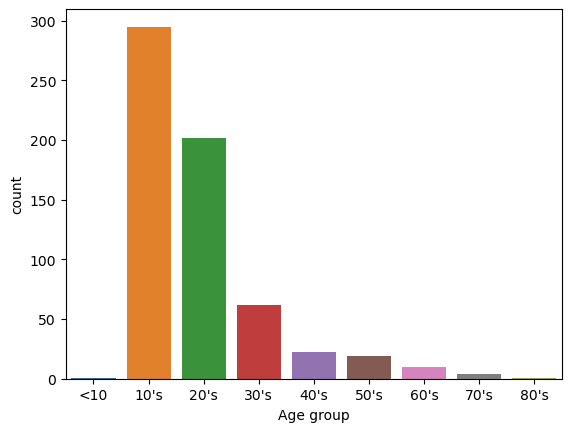

In [131]:
sns.countplot(data=data_mmh, x="Age group")

In [ ]:
#df['age_group'] = pd.cut(df['age'], 3)
labels = ["<10", "10's", "20's", "30's", "40's", "50's", "60's", "70's", "80's"]
data_mmh['Age group'] = pd.cut(data_mmh['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90], labels = labels)
#data_mmh['Age group'] = pd.cut(data_mmh['Age'], 9)
#data_mmh
data_mmh[['Age','Age group']]

data_mmh['Age group'].value_counts()

sns.countplot(data=data_mmh, x="Age group")


### Move from LinearRegression to ANOVA test:

In [86]:
data_mmh.groupby(['Age group']).agg({'Anxiety': 'mean'}) #categorical vs numerical

,Anxiety
Age group,
"(9.921, 18.778]",6.075980
"(18.778, 27.556]",6.064639
"(27.556, 36.333]",6.153846
"(36.333, 45.111]",5.827586
"(45.111, 53.889]",2.750000
"(53.889, 62.667]",3.352941
"(62.667, 71.444]",5.000000
"(71.444, 80.222]",4.000000
"(80.222, 89.0]",0.000000


**For 'Age group' and 'Anxiety':**
Now 'Age group' is categorical, so do ANOVA test for categorical vs numerical

### Move from Linear Regression to Chi2 test

In [93]:
musiceffects_age = pd.crosstab(data_mmh['Age group'], data_mmh['Music effects'])
musiceffects_age

Music effects,Improve,No effect,Worsen
Age group,,,
"(9.921, 18.778]",167,32,5
"(18.778, 27.556]",196,62,5
"(27.556, 36.333]",54,21,3
"(36.333, 45.111]",19,8,2
"(45.111, 53.889]",8,4,0
"(53.889, 62.667]",11,6,0
"(62.667, 71.444]",7,1,0
"(71.444, 80.222]",4,0,0
"(80.222, 89.0]",0,1,0


**For 'Age group' and 'Music effects':** Now 'Age group' is categorical, so do Chi2 test for categorical vs categorical

In [54]:
# Aggregate_numerical_vs_numerical

# Calculate the correlation coefficient
correlation = data_mmh['Age'].corr(data_mmh['Anxiety'])
print(f'Correlation coefficient: {correlation}')

Correlation coefficient: -0.19516395086552712


A correlation value close to 1 indicates a strong positive linear relationship, close to -1 indicates a strong negative linear relationship, and **close to 0 suggests little to no linear relationship.**

Don't use 'Age' and 'Anxiety' in model

But what about: 
* Age and Depression
* Age and Insomnia
* Age and OCD

### This scatterplot for these columns says there is no correlation?

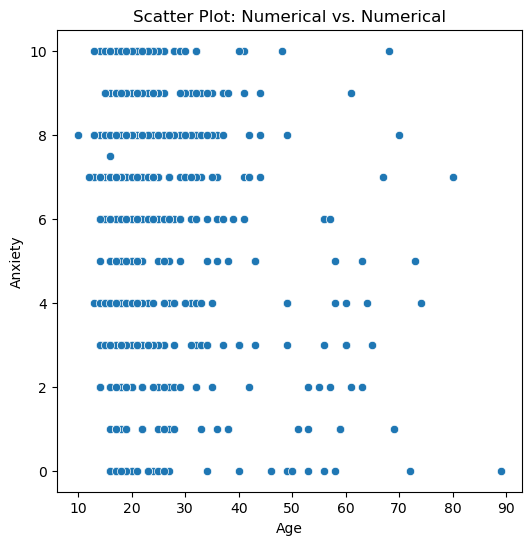

In [55]:
# Create a scatter plot  # This scatterplot for these columns says there is no correlation?
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Age', y='Anxiety', data=data_mmh)
plt.xlabel('Age')
plt.ylabel('Anxiety')
plt.title('Scatter Plot: Numerical vs. Numerical')
plt.show()

### Doesnt make sense remove this test:

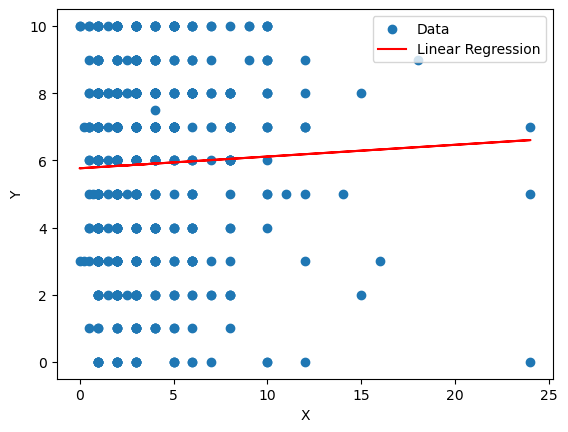

Slope (Coefficient): 0.034997870736764795
Intercept: 5.762581740182036
R-squared: 0.0015149031796761747
Mean Squared Error: 7.594112976847295


In [4]:
# Test for checking relationship between numerical and numerical #LinearRegression # doesnt make sense remove this test

#1) Import Libraries:
#First, import the necessary libraries:

from sklearn.linear_model import LinearRegression
#___________________________________________________

#2) Load Your Data:
#Load your data into a Pandas DataFrame. 
#Suppose you have a DataFrame with two numerical columns 'X' and 'Y':

data_mmh = pd.read_csv('../../data/cleaned/data_mmh_cleaned2.csv', index_col=0)
#data = pd.read_csv('your_data.csv')
X = data_mmh['Hours per day'].values.reshape(-1, 1)
Y = data_mmh['Anxiety'].values

#___________________________________________________

#3) Create and Fit the Model:
#Create a linear regression model and fit it to your data:

model = LinearRegression()
model.fit(X, Y)

#___________________________________________________

#4) Make Predictions:
#You can use your trained model to make predictions:

predictions = model.predict(X)

#___________________________________________________

#5) Visualize the Results:
#Visualize the regression line along with your data points to see how well the model fits:

import matplotlib.pyplot as plt

plt.scatter(X, Y, label='Data')
plt.plot(X, predictions, color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#___________________________________________________

#6) Get the Coefficients:
#You can also retrieve the coefficients (slope and intercept) of the linear regression line:

slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")

#___________________________________________________

#7) Evaluate the Model:
#Assess the model's performance using metrics like R-squared and mean squared error (MSE):

from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(Y, predictions)
mse = mean_squared_error(Y, predictions)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

### Get right aggregation for categorical:

In [ ]:
# Get 'Age' (numerical) for 'Depression': # get right aggregation for categorical
data_mmh.groupby(['Age']).agg({'Depression': 'mean'})
# Get 'Age' (numerical) for 'Insomnia':
data_mmh.groupby(['Age']).agg({'Insomnia': 'mean'})
# Get 'Age' (numerical) for 'OCD':
data_mmh.groupby(['Age']).agg({'OCD': 'mean'})

In [ ]:
age_depression = pd.crosstab(data_mmh['Age'], data_mmh['Depression'])
age_depression

In [156]:
# Aggregate_numerical_vs_numerical

# Calculate the correlation coefficient
correlation = data_mmh['Age'].corr(data_mmh['Depression'])
print(f'Correlation coefficient: {correlation}')

Correlation coefficient: -0.08670034512117054


A correlation value close to 1 indicates a strong positive linear relationship, close to -1 indicates a strong negative linear relationship, and **close to 0 suggests little to no linear relationship.**

Don't use 'Age' and 'Depression' in model

But what about: 
* Age and Insomnia
* Age and OCD

In [ ]:
age_insomnia = pd.crosstab(data_mmh['Age'], data_mmh['Insomnia'])
age_insomnia

In [157]:
# Aggregate_numerical_vs_numerical

# Calculate the correlation coefficient
correlation = data_mmh['Age'].corr(data_mmh['Insomnia'])
print(f'Correlation coefficient: {correlation}')

Correlation coefficient: 0.007850531880007155


A correlation value close to 1 indicates a strong positive linear relationship, close to -1 indicates a strong negative linear relationship, and **close to 0 suggests little to no linear relationship.**

Don't use 'Age' and 'Insomnia' in model

But what about: 
* Age and OCD

In [ ]:
age_ocd = pd.crosstab(data_mmh['Age'], data_mmh['OCD'])
age_ocd

In [158]:
# Aggregate_numerical_vs_numerical

# Calculate the correlation coefficient
correlation = data_mmh['Age'].corr(data_mmh['OCD'])
print(f'Correlation coefficient: {correlation}')

Correlation coefficient: -0.1405078035997699


A correlation value close to 1 indicates a strong positive linear relationship, close to -1 indicates a strong negative linear relationship, and **close to 0 suggests little to no linear relationship.**

Don't use 'Age' and 'OCD' in model

## Statistical Test: Chi2 (categorical vs. categorical)

The chi2 value is the test statistic, and the p value is the probability of 
observing the results if the null hypothesis is true. 

* Null Hypothesis (H0): There is no significant association between the two categorical variables; they are independent.
* Alternative Hypothesis (H1): There is a significant association between the two categorical variables; they are dependent.

A small p-value (typically less than 0.05) suggests that there is a significant association between the two 
categorical variables.

If the p-value is less than your chosen significance level, you can reject the null hypothesis and conclude that there is a significant association between the two categorical variables.

If the p-value is greater than the significance level, you fail to reject the null hypothesis, suggesting that the two categorical variables are independent.

### 1) Connection **disease** and **music use** | Chi2 (categorical vs. categorical):

In [8]:
# Mussic effects (c) and 'While working' (c)
#contingency_table = pd.crosstab(df['Category1'], df['Category2'])

musiceffects_ww = pd.crosstab(data_mmh['Music effects'], data_mmh['While working'])
musiceffects_ww

While working,No,Yes
Music effects,,
Improve,79,387
No effect,42,93
Worsen,5,10


In [7]:
# Test for checking relationship between categorical and categorical # Chi2

from scipy import stats

# Create a contingency table (cross-tabulation)
musiceffects_ww = pd.crosstab(data_mmh['Music effects'], data_mmh['While working'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_ww)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")



Chi-Square statistic: 14.463517496650542
P-value: 0.0007232477331809323


* **p-value** (typically **< 0.05**) suggests that there is a **significant association** between the two categorical variables.

* If the p-value is less than your chosen significance level, you can **reject the null hypothesis** and **conclude** that there is a **significant association between the two categorical variables**.

We reject H0

* Significant association
* **Use column for model**

<Axes: xlabel='While working', ylabel='Music effects'>

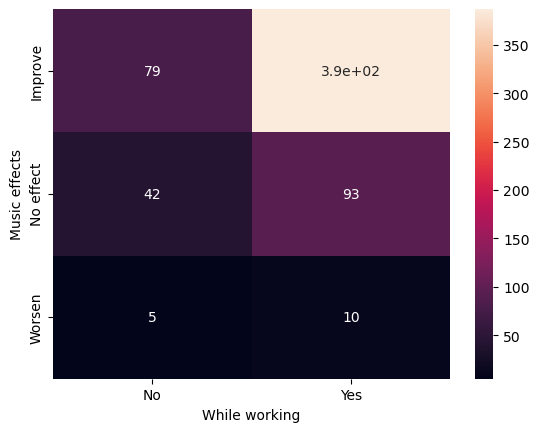

In [12]:
sns.heatmap(musiceffects_ww, annot=True)

In [ ]:
# Mussic effects (c) and 'Instrumentalist' (c)
musiceffects_i = pd.crosstab(data_mmh['Music effects'], data_mmh['Instrumentalist'])
musiceffects_i

In [11]:
# Test for checking relationship between categorical and categorical # Chi2

# Create a contingency table (cross-tabulation)
musiceffects_i = pd.crosstab(data_mmh['Music effects'], data_mmh['Instrumentalist'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_i)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")


Chi-Square statistic: 5.533535050071529
P-value: 0.06286488583105437


**p-value** (typically < 0.05) suggests that there is a significant association between the two categorical variables.

If the p-value is greater than the significance level, you **fail to reject the null hypothesis**, **suggesting that the two categorical variables are independent.**

In [ ]:
# Mussic effects (c) and 'Composer' (c)
musiceffects_c = pd.crosstab(data_mmh['Music effects'], data_mmh['Composer'])
musiceffects_c

In [10]:
# Test for checking relationship between categorical and categorical # Chi2

# Create a contingency table (cross-tabulation)
musiceffects_c = pd.crosstab(data_mmh['Music effects'], data_mmh['Composer'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_c)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square statistic: 4.218060926562638
P-value: 0.12135556809388895


**p-value** (typically < 0.05) suggests that there is a significant association between the two categorical variables.

If the p-value is greater than the significance level, you **fail to reject the null hypothesis**, **suggesting that the two categorical variables are independent.**


So should **not use it to try to predict music effects**

### 2) Connection **disease** and **music preference** | Chi2 (categorical vs. categorical):


In [22]:
musiceffects_fg = pd.crosstab(data_mmh['Music effects'], data_mmh['Favorite genre'])
musiceffects_fg 

Favorite genre,Classical,Country,EDM,Folk,Gospel,Hip hop,Jazz,K pop,Latin,Lofi,Metal,Pop,R&B,Rap,Rock,Video game music
Music effects,,,,,,,,,,,,,,,,
Improve,26,18,30,20,4,28,16,17,1,10,57,75,22,15,107,20
No effect,11,3,6,5,0,4,3,4,1,0,20,20,8,4,35,11
Worsen,1,0,0,0,0,0,0,0,0,0,0,2,0,1,7,4


In [26]:
# Test for checking relationship between categorical and categorical # Chi2

# Create a contingency table (cross-tabulation)
musiceffects_fg = pd.crosstab(data_mmh['Music effects'], data_mmh['Favorite genre'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_fg)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")


Chi-Square statistic: 37.08590408808095
P-value: 0.1746539809839702


**p-value** (typically < 0.05) suggests that there is a significant association between the two categorical variables.

If the p-value is greater than the significance level, you **fail to reject the null hypothesis**, **suggesting that the two categorical variables are independent.**
______

In [23]:
musiceffects_e = pd.crosstab(data_mmh['Music effects'], data_mmh['Exploratory'])
musiceffects_e 

Exploratory,No,Yes
Music effects,,
Improve,107,359
No effect,52,83
Worsen,6,9


In [27]:
# Test for checking relationship between categorical and categorical # Chi2

# Create a contingency table (cross-tabulation)
musiceffects_e = pd.crosstab(data_mmh['Music effects'], data_mmh['Exploratory'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_e)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square statistic: 14.287262045534138
P-value: 0.0007898788151872835


* **p-value** (typically **< 0.05**) suggests that there is a **significant association** between the two categorical variables.

* If the p-value is less than your chosen significance level, you can **reject the null hypothesis** and **conclude** that there is a **significant association between the two categorical variables**.

We reject H0

* Significant association
* **Use column for model**

<Axes: xlabel='Exploratory', ylabel='Music effects'>

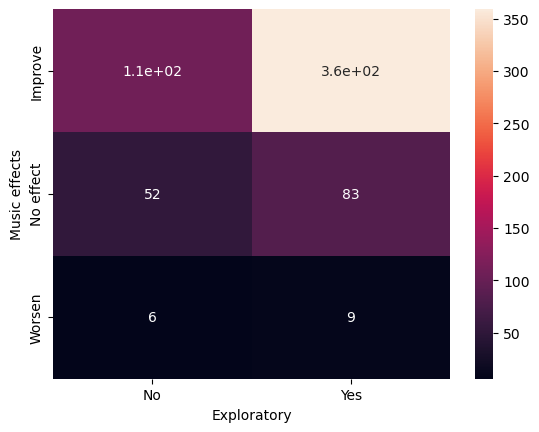

In [29]:
sns.heatmap(musiceffects_e, annot=True)

In [24]:
musiceffects_fl = pd.crosstab(data_mmh['Music effects'], data_mmh['Foreign languages'])
musiceffects_fl 

Foreign languages,No,Yes
Music effects,,
Improve,202,264
No effect,60,75
Worsen,7,8


In [28]:
# Test for checking relationship between categorical and categorical # Chi2

# Create a contingency table (cross-tabulation)
musiceffects_fl = pd.crosstab(data_mmh['Music effects'], data_mmh['Foreign languages'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_fl)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square statistic: 0.10735832280522412
P-value: 0.9477361280582856


**p-value** (typically < 0.05) suggests that there is a significant association between the two categorical variables.

If the p-value is greater than the significance level, you **fail to reject the null hypothesis**, **suggesting that the two categorical variables are independent.**
______

### 3) Connection **disease** and **music genres** | Chi2 (categorical vs. categorical):


In [ ]:
musiceffects_fg = pd.crosstab(data_mmh['Music effects'], data_mmh['Favorite genre'])
musiceffects_fg 

In [31]:
# Test for checking relationship between categorical and categorical # Chi2

# Create a contingency table (cross-tabulation)
musiceffects_fg = pd.crosstab(data_mmh['Music effects'], data_mmh['Favorite genre'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_fg)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square statistic: 37.08590408808095
P-value: 0.1746539809839702


In [ ]:
musiceffects_fcl = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Classical]'])
musiceffects_fcl

In [32]:
# Test for checking relationship between categorical and categorical # Chi2

# Create a contingency table (cross-tabulation)
musiceffects_fcl = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Classical]'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_fcl)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square statistic: 2.3170760282976772
P-value: 0.8883518424318094


In [ ]:
musiceffects_fco = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Country]'])
musiceffects_fco

In [33]:
# Test for checking relationship between categorical and categorical # Chi2

# Create a contingency table (cross-tabulation)
musiceffects_fco = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Country]'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_fco)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square statistic: 5.953177509810315
P-value: 0.42845559033298963


In [ ]:
musiceffects_fedm = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [EDM]'])
musiceffects_fedm

In [34]:
# Test for checking relationship between categorical and categorical # Chi2

# Create a contingency table (cross-tabulation)
musiceffects_fedm = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [EDM]'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_fedm)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square statistic: 8.748554578183645
P-value: 0.1882208034458685


In [ ]:
musiceffects_ff = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Folk]'])
musiceffects_ff

In [35]:
# Test for checking relationship between categorical and categorical # Chi2

# Create a contingency table (cross-tabulation)
musiceffects_ff = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Folk]'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_ff)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square statistic: 3.0551762868125794
P-value: 0.8018904542214415


In [ ]:
musiceffects_fgo = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Gospel]'])
musiceffects_fgo

In [36]:
# Test for checking relationship between categorical and categorical # Chi2

# Create a contingency table (cross-tabulation)
musiceffects_fgo = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Gospel]'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_fgo)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square statistic: 9.37577491654745
P-value: 0.15352144925024333


In [ ]:
musiceffects_fhh = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Hip hop]'])
musiceffects_fhh

In [37]:
# Test for checking relationship between categorical and categorical # Chi2

# Create a contingency table (cross-tabulation)
musiceffects_fhh = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Hip hop]'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_fhh)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square statistic: 7.584688370652375
P-value: 0.2701354648804667


In [ ]:
musiceffects_fja = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Jazz]'])
musiceffects_fja

In [38]:
# Test for checking relationship between categorical and categorical # Chi2

# Create a contingency table (cross-tabulation)
musiceffects_fja = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Jazz]'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_fja)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square statistic: 2.862609066243372
P-value: 0.8258828106852967


In [ ]:
musiceffects_fkp = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [K pop]'])
musiceffects_fkp

In [39]:
# Test for checking relationship between categorical and categorical # Chi2

# Create a contingency table (cross-tabulation)
musiceffects_fkp = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [K pop]'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_fkp)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square statistic: 9.272622793650186
P-value: 0.15881647957069922


In [ ]:
musiceffects_fla = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Latin]'])
musiceffects_fla

In [40]:
# Test for checking relationship between categorical and categorical # Chi2

# Create a contingency table (cross-tabulation)
musiceffects_fla = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Latin]'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_fla)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square statistic: 4.7337528230370225
P-value: 0.5783862470351306


In [ ]:
musiceffects_flo = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Lofi]'])
musiceffects_flo

In [41]:
# Test for checking relationship between categorical and categorical # Chi2

# Create a contingency table (cross-tabulation)
musiceffects_flo = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Lofi]'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_flo)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square statistic: 8.632922257816553
P-value: 0.19529885887186416


In [ ]:
musiceffects_fme = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Metal]'])
musiceffects_fme

In [42]:
# Test for checking relationship between categorical and categorical # Chi2

# Create a contingency table (cross-tabulation)
musiceffects_fme = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Metal]'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_fme)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square statistic: 2.05254175715444
P-value: 0.9148034304245124


In [ ]:
musiceffects_fpo = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Pop]'])
musiceffects_fpo

In [43]:
# Test for checking relationship between categorical and categorical # Chi2

# Create a contingency table (cross-tabulation)
musiceffects_fpo = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Pop]'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_fpo)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square statistic: 10.608517402412957
P-value: 0.10125580909921729


In [ ]:
musiceffects_frb = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [R&B]'])
musiceffects_frb

In [45]:
# Test for checking relationship between categorical and categorical # Chi2

# Create a contingency table (cross-tabulation)
musiceffects_frb = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [R&B]'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_frb)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square statistic: 10.683893207758276
P-value: 0.09865136073971872


In [ ]:
musiceffects_fra = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Rap]'])
musiceffects_fra

In [46]:
# Test for checking relationship between categorical and categorical # Chi2

# Create a contingency table (cross-tabulation)
musiceffects_fra = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Rap]'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_fra)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square statistic: 2.437068067678863
P-value: 0.8754431975993497


In [ ]:
musiceffects_fro = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Rock]'])
musiceffects_fro

In [47]:
# Test for checking relationship between categorical and categorical # Chi2

# Create a contingency table (cross-tabulation)
musiceffects_fro = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Rock]'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_fro)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square statistic: 3.3957279536086786
P-value: 0.7577869631162514


In [ ]:
musiceffects_fvgm = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Video game music]'])
musiceffects_fvgm

In [48]:
# Test for checking relationship between categorical and categorical # Chi2

# Create a contingency table (cross-tabulation)
musiceffects_fvgm = pd.crosstab(data_mmh['Music effects'], data_mmh['Frequency [Video game music]'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_fvgm)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square statistic: 9.554013212409473
P-value: 0.14473381453389528


**p-value** (typically < 0.05) suggests that there is a significant association between the two categorical variables.

If the p-value is greater than the significance level, you **fail to reject the null hypothesis**, **suggesting that the two categorical variables are independent.**

### 5) Connections **disease** and **age** | Chi2 (categorical vs. categorical):

In [136]:
musiceffects_age = pd.crosstab(data_mmh['Age group'], data_mmh['Music effects']) #categorical vs. categorical
musiceffects_age

Music effects,Improve,No effect,Worsen
Age group,,,
<10,1,0,0
10's,239,50,6
20's,147,51,4
30's,38,19,5
40's,17,5,0
50's,11,8,0
60's,9,1,0
70's,4,0,0
80's,0,1,0


In [165]:
# Test for checking relationship between categorical and categorical # Chi2

# Create a contingency table (cross-tabulation)
musiceffects_age = pd.crosstab(data_mmh['Age group'], data_mmh['Music effects'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_age)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square statistic: 29.643448334339475
P-value: 0.01994138082664598


* **p-value** (typically **< 0.05**) suggests that there is a **significant association** between the two categorical variables.

* If the p-value is less than your chosen significance level, you can **reject the null hypothesis** and **conclude** that there is a **significant association between the two categorical variables**.

We reject H0

* Significant association
* **Use column for model**

<Axes: xlabel='Music effects', ylabel='Age group'>

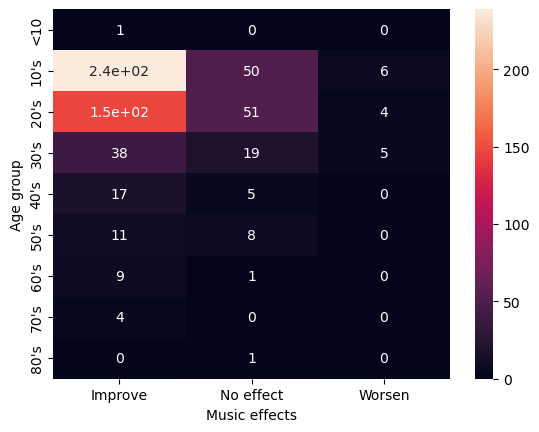

In [166]:
sns.heatmap(musiceffects_age, annot=True)

___________________

### 1) Connection disease and music use:

* Positive test results:
	* 'Music effects' and 'While working'
	* 'Music effects' and 'Exploratory'
    
### 2) Connection disease and music preference:
### 3) Connection disease and music genres:
### 4) Connection disease and greatest music effects:
* Positive test results:
	* ‘Music effects’  and ‘Depression’
### 5) Connections disease and age:
* Positive test results:
	* ‘Age group’  and ‘Music effects’

### 6) Can I make helpful recommendations based on these findings?
* When I learned to make a succesful model
* Add to the research by doing a new survey and explore elements in music and find significant connections
___________________